 # Interactive Vega-Altair with Jupyter Widgets
 This notebook will guide you through using [Vega-Altair](https://altair-viz.github.io/) along with [Jupyter Widgets](https://ipywidgets.readthedocs.io/en/stable/)

# Setup
First, import what we need.

In [27]:
import math
import altair as alt
from altair import datum
import pandas as pd
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from vega_datasets import data

Then, check versions of installed packages.

In [28]:
'ipywidgets ' + widgets.__version__ + 
', altair ' + alt.__version__ + 
', pandas ' + pd.__version__ + 
', numpy ' + np.__version__

'ipywidgets 8.1.1, altair 5.1.2, pandas 2.0.3, numpy 1.26.0'

Allow Altair to use more than 5000 rows

In [29]:
alt.data_transformers.enable('vegafusion')

DataTransformerRegistry.enable('vegafusion')

In [30]:
alt.renderers.enable('png')

RendererRegistry.enable('png')

# Jupyter Widgets Examples

We are going to use [Jupyter Widgets](https://ipywidgets.readthedocs.io/en/stable/) to create basic interactions with Altair. You can see the documentation for [all the available widgets here](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html). Note that you should use the decorator syntax, as the other approach [is more complicated with Altair](https://github.com/altair-viz/altair/issues/2107). For example, this uses the `@interact` decorator syntax to have a `Text` widget run a function we define:

In [31]:
@interact(
    str1=widgets.Text(
        value='Hello',
        description='Input string 1:'
    )
)
def print10X(str1):
    for i in range (10):
        print(' '.join([str1, str(i)]))



interactive(children=(Text(value='Hello', description='Input string 1:'), Output()), _dom_classes=('widget-int…

This is the alternative that doesn't use decorators. Note how it takes more code to do the same thing, and that displaying the output of a Vega-Altair visualization is more problematic than text.

In [32]:
textWidget = widgets.Text(
    value='Hello World!',
    description='Input string:'
)
output = widgets.Output()

display(textWidget, output)

def print10X(change):
    inputStr = change['new']
    with output:
        print(change)
        for i in range (10):
            print(' '.join([inputStr, str(i)]))

textWidget.observe(print10X, names='value')

Text(value='Hello World!', description='Input string:')

Output()

In [33]:
@interact(
    str1=widgets.Text(
        value='Hello',
        description='Input string 1:'
    ),
    str2=widgets.Text(
        value='World!',
        description='Input string 2:'
    ),
)
def print10XPair(str1, str2):
    for i in range (10):
        print(' '.join([str1, str2, str(i)]))

interactive(children=(Text(value='Hello', description='Input string 1:'), Text(value='World!', description='In…

Here's another example using an `IntSlider`:

In [34]:
@interact(
    x=widgets.IntSlider(
        value=7,
        min=0,
        max=10,
        step=1,
        description='x:'
    )
)
def times10(x):
    print(x * 10)

interactive(children=(IntSlider(value=7, description='x:', max=10), Output()), _dom_classes=('widget-interact'…

# Jupyter Widgets and Altair

## Birdstrikes data barcharts

We are going to load the birdstrikes dataset from `vega-datasets`.

In [35]:
birdStrikesDF = data.birdstrikes()
birdStrikesDF

,Airport__Name,Aircraft__Make_Model,Effect__Amount_of_damage,Flight_Date,Aircraft__Airline_Operator,Origin_State,When__Phase_of_flight,Wildlife__Size,Wildlife__Species,When__Time_of_day,Cost__Other,Cost__Repair,Cost__Total_$,Speed_IAS_in_knots
0,BARKSDALE AIR FORCE BASE ARPT,T-38A,None,1/8/90 0:00,MILITARY,Louisiana,Climb,Large,Turkey vulture,Day,0,0,0,300.0
1,BARKSDALE AIR FORCE BASE ARPT,KC-10A,None,1/9/90 0:00,MILITARY,Louisiana,Approach,Medium,Unknown bird or bat,Night,0,0,0,200.0
2,BARKSDALE AIR FORCE BASE ARPT,B-52,None,1/11/90 0:00,MILITARY,Louisiana,Take-off run,Medium,Unknown bird or bat,Day,0,0,0,130.0
3,NEW ORLEANS INTL,B-737-300,Substantial,1/11/90 0:00,SOUTHWEST AIRLINES,Louisiana,Take-off run,Small,Rock pigeon,Day,0,0,0,140.0
4,BARKSDALE AIR FORCE BASE ARPT,KC-10A,None,1/12/90 0:00,MILITARY,Louisiana,Climb,Medium,Unknown bird or bat,Day,0,0,0,160.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,LAGUARDIA NY,A-319,None,7/24/02 0:00,US AIRWAYS*,New York,Climb,Small,European starling,Day,0,0,0,NaN
9996,DALLAS/FORT WORTH INTL ARPT,MD-83,None,7/24/02 0:00,AMERICAN AIRLINES,Texas,Descent,Small,Unknown bird - small,Day,0,0,0,250.0
9997,DENVER INTL AIRPORT,MD-82,None,7/24/02 0:00,AMERICAN AIRLINES,Colorado,Take-off run,Small,Horned lark,Day,0,0,0,120.0
9998,BARKSDALE AIR FORCE BASE ARPT,B-52H,None,7/25/02 0:00,MILITARY,Louisiana,Climb,Medium,Unknown bird or bat,Day,0,0,0,110.0


Now, let's create a bar chart of some of the data.

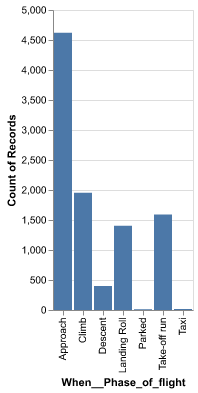

In [36]:
alt.Chart(birdStrikesDF).mark_bar().encode(
    x='When__Phase_of_flight',
    y='count()'
)

Let's add a title to describe this chart.

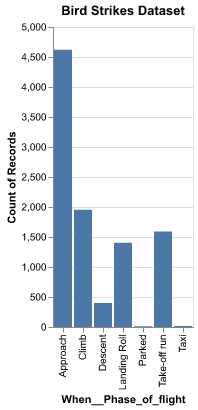

In [37]:
alt.Chart(
        birdStrikesDF,
        title=alt.Title(
            'Bird Strikes Dataset'
        )
    ).mark_bar().encode(
    x='When__Phase_of_flight',
    y='count()'
)

That's only one of the attributes. Can we use Jupyter Widgets to select arbitrary ones?

In [38]:
@interact(xcol=widgets.Dropdown(
    options=list(birdStrikesDF.columns),
    value='When__Phase_of_flight',
    description='Column:',
))
def barChart(xcol):
    return alt.Chart(
            birdStrikesDF,
            title=alt.Title(
                'Bird Strikes Dataset'
            )
        ).mark_bar().encode(
        x=xcol,
        y='count()'
    )

interactive(children=(Dropdown(description='Column:', index=6, options=('Airport__Name', 'Aircraft__Make_Model…

Can we look at just bird strikes that were within certain cost ranges?

First, let's set up the column and range of values we're working with.

In [39]:
costCol = 'Cost__Total_$'
costRangeInData=[# thousands
    math.floor(birdStrikesDF[costCol].min() / 1000), 
    math.ceil(birdStrikesDF[costCol].max() / 1000)
]
costRangeInData

[0, 7044]

In [47]:
@interact(
    xcol=widgets.Dropdown(
        options=list(birdStrikesDF.columns),
        value='When__Phase_of_flight',
        description='Column:',
    ),
    costRange=widgets.IntRangeSlider(
        value=costRangeInData,
        min=costRangeInData[0],
        max=costRangeInData[1],
        step=1,
        description='Cost range:'
    )
)
def barChartRanges(xcol, costRange):
    return alt.Chart(
        birdStrikesDF,
        title=alt.Title(
            'Bird Strikes Dataset',
            subtitle='With costs $' + 
            str(costRange[0]) + '–' + 
            str(costRange[1]) + 'k'
        )
    ).transform_filter(
        ((datum[costCol] >= (costRange[0] * 1000)) &
         (datum[costCol] <= (costRange[1] * 1000)))
    ).mark_bar().encode(
        x=xcol,
        y='count()'
    )

interactive(children=(Dropdown(description='Column:', index=6, options=('Airport__Name', 'Aircraft__Make_Model…

## Iris data scatterplots

We are going to load the iris dataset from `vega-datasets`.

In [41]:
irisDF = data.iris()
irisDF

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Creating a simple scatterplot

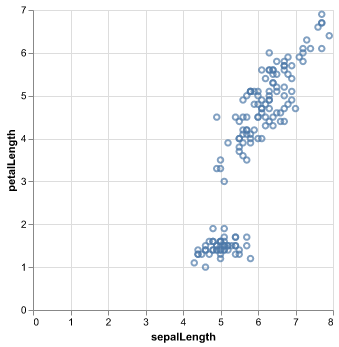

In [42]:
def irisScatter():
    irisChart = alt.Chart(irisDF)
    
    points = irisChart.mark_point().encode(
        x='sepalLength',
        y='petalLength',
    )

    return points
irisScatter()

Adding a tooltip and color. You can use any color from the [valid Vega-Lite color schemes](https://vega.github.io/vega/docs/schemes/
).

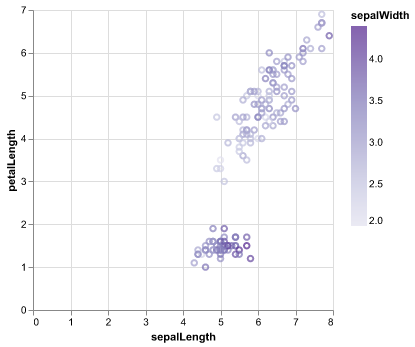

In [43]:
def irisScatter():
    irisChart = alt.Chart(irisDF)
    
    points = irisChart.mark_point().encode(
        x='sepalLength',
        y='petalLength',
        color=alt.Color('sepalWidth', scale=alt.Scale(scheme='purples')),
        tooltip=['sepalLength', 'petalLength', 'sepalWidth', 'petalWidth']
    )

    return points
irisScatter()

Now, let's add some a [brush](https://altair-viz.github.io/gallery/interactive_brush.html) for some interactivity. This is one of many types of [interactivity Vega-Altair can provide](https://altair-viz.github.io/user_guide/interactions.html).

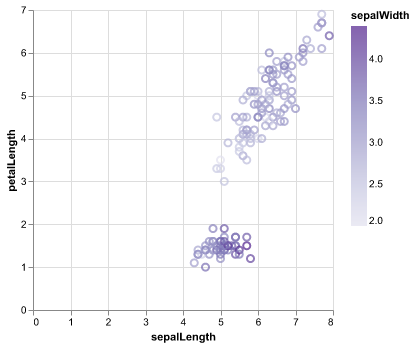

In [44]:
def irisBrushScatter():
    brush = alt.selection_interval(encodings=['x', 'y'])
    
    irisChart = alt.Chart(irisDF)
    
    points = irisChart.mark_point().encode(
        x='sepalLength',
        y='petalLength',
        color=alt.Color('sepalWidth', scale=alt.Scale(scheme='purples')),
        size=alt.condition(brush, alt.value(50), alt.value(1)),
        tooltip=['sepalLength', 'petalLength', 'sepalWidth', 'petalWidth']
    ).add_params(
        brush
    )
    
    return points
irisBrushScatter()

Finally, lets add a line to show the median value.

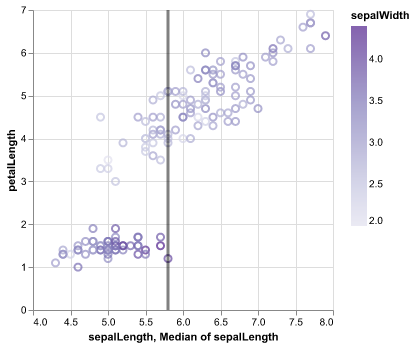

In [45]:
brush = alt.selection_interval(encodings=['x', 'y'])

irisChart = alt.Chart()

points = irisChart.mark_point().encode(
    x='sepalLength',
    y='petalLength',
    color=alt.Color('sepalWidth', scale=alt.Scale(scheme='purples')),
    size=alt.condition(brush, alt.value(50), alt.value(1)),
    tooltip=['sepalLength', 'petalLength', 'sepalWidth', 'petalWidth']
).add_params(
    brush
)

meanLine = alt.Chart().mark_rule(color='black', opacity=.5).encode(
    x=alt.X('median(sepalLength):Q', scale=alt.Scale(zero=False)),
    size=alt.SizeValue(3)
).transform_filter(
    brush
)

alt.layer(points, meanLine, data=irisDF)

There you go! All done.